<a href="https://colab.research.google.com/github/stinajoss/Bibliometri_GU/blob/main/geovetenskap_snip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

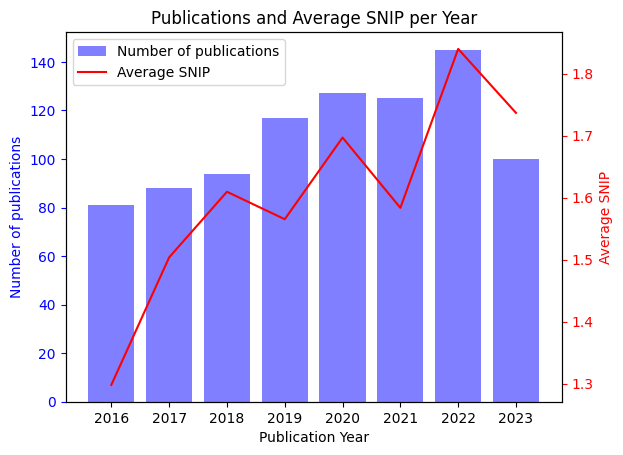

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('geovet_snip_unika.xlsx')

# Filter the data for the years 2016-2023
df = df[df['pubyear'].between(2016, 2023)]

# Calculate the number of ids and the average snip per year
id_counts = df.groupby('pubyear')['id'].count()
snip_avg = df.groupby('pubyear')['snip'].mean()

# Create a new figure and a subplot
fig, ax1 = plt.subplots()

# Plot the number of ids per year
ax1.bar(id_counts.index, id_counts, color='b', alpha=0.5, label='Number of publications')
ax1.set_xlabel('Publication Year')
ax1.set_ylabel('Number of publications', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis for the average snip values
ax2 = ax1.twinx()
ax2.plot(snip_avg.index, snip_avg, color='r', label='Average SNIP')
ax2.set_ylabel('Average SNIP', color='r')
ax2.tick_params('y', colors='r')

# Set the title of the chart
ax1.set_title('Publications and Average SNIP per Year')

# Show the legend
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

# Show the plot
plt.show()

# Save the figure
fig.savefig('publ_per_year.png')

# Save the data to an xlsx file
df.to_excel('output.xlsx', index=False)


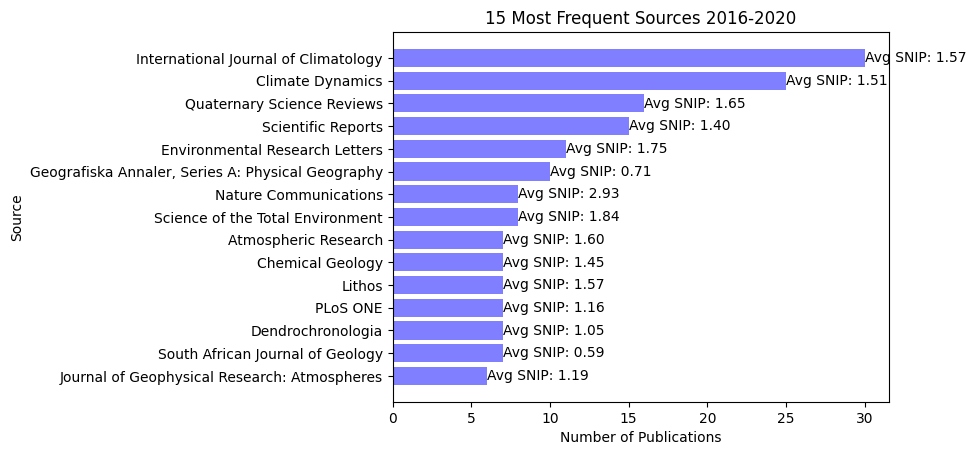

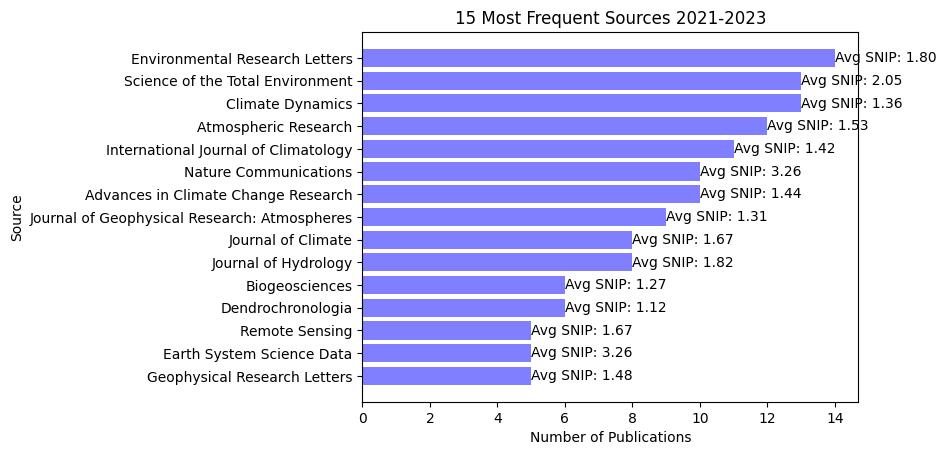

In [8]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_excel('geovet_snip_unika.xlsx')

# Function to create the chart
def create_chart(df, start_year, end_year, title):
    # Filter the data for the specified years
    df = df[df['pubyear'].between(start_year, end_year)]

    # Calculate the average SNIP and the count of ids per source
    snip_avg = df.groupby('source')['snip'].mean()
    id_counts = df.groupby('source')['id'].count()

    # Combine the two dataframes and sort by the number of ids
    combined = pd.concat([snip_avg, id_counts], axis=1, keys=['Average SNIP', 'Number of ids'])
    combined = combined.sort_values('Number of ids', ascending=True)

    # Take the top 15 sources by the number of ids
    combined = combined.tail(15)

    # Create a new figure and a subplot
    fig, ax = plt.subplots()

    # Plot the number of ids per source
    bars = ax.barh(combined.index, combined['Number of ids'], color='b', alpha=0.5, label='Number of ids')
    ax.set_xlabel('Number of Publications')
    ax.set_ylabel('Source')

    # Write the average SNIP in the bars
    for bar, snip in zip(bars, combined['Average SNIP']):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'Avg SNIP: {snip:.2f}', va='center')

    # Set the title of the chart
    ax.set_title(title)

    # Show the plot
    plt.show()

    # Save the figure
    fig.savefig(f'sources_{start_year}_{end_year}.png')

# Create the charts
create_chart(df, 2016, 2020, '15 Most Frequent Sources 2016-2020')
create_chart(df, 2021, 2023, '15 Most Frequent Sources 2021-2023')




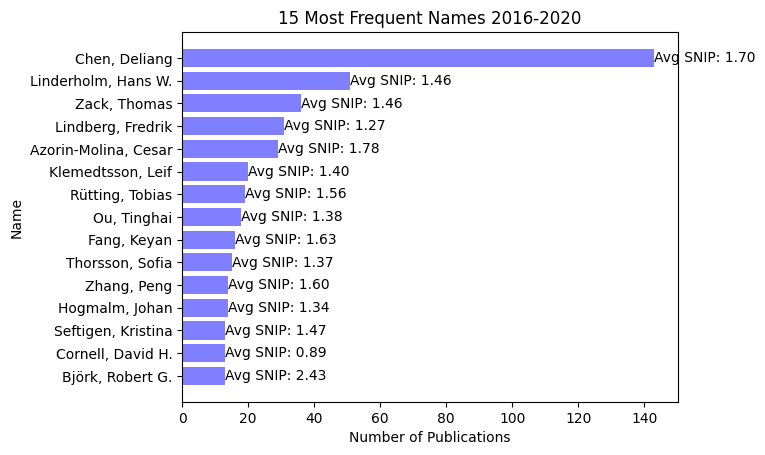

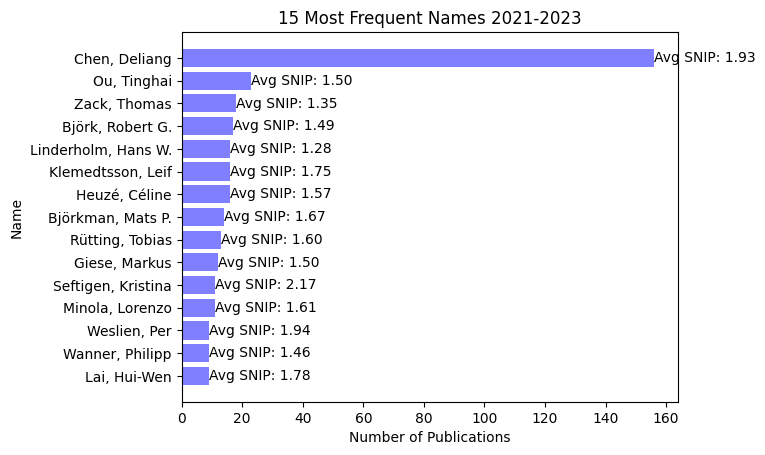

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_excel('geovet_snip_individ.xlsx')

# Function to create the chart
def create_chart(df, start_year, end_year, title):
    # Filter the data for the specified years
    df = df[df['pubyear'].between(start_year, end_year)]

    # Calculate the average SNIP and the count of ids per name
    snip_avg = df.groupby('name')['snip'].mean()
    id_counts = df.groupby('name')['id'].count()

    # Combine the two dataframes and sort by the number of ids
    combined = pd.concat([snip_avg, id_counts], axis=1, keys=['Average SNIP', 'Number of ids'])
    combined = combined.sort_values('Number of ids', ascending=True)

    # Take the top 15 names by the number of ids
    combined = combined.tail(15)

    # Create a new figure and a subplot
    fig, ax = plt.subplots()

    # Plot the number of ids per name
    bars = ax.barh(combined.index, combined['Number of ids'], color='b', alpha=0.5, label='Number of ids')
    ax.set_xlabel('Number of Publications')
    ax.set_ylabel('Name')

    # Write the average SNIP in the bars
    for bar, snip in zip(bars, combined['Average SNIP']):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'Avg SNIP: {snip:.2f}', va='center')

    # Set the title of the chart
    ax.set_title(title)

    # Show the plot
    plt.show()

    # Save the figure
    fig.savefig(f'names_{start_year}_{end_year}.png')

# Create the charts
create_chart(df, 2016, 2020, '15 Most Frequent Names 2016-2020')
create_chart(df, 2021, 2023, '15 Most Frequent Names 2021-2023')


In [4]:
import pandas as pd

# Load the data
df = pd.read_excel('geovet_snip_keywords.xlsx')

# Drop rows with missing 'Author Keywords'
df = df.dropna(subset=['Author Keywords'])

# Split the 'Author Keywords' column by semicolon, strip whitespace, and convert to lowercase
keywords = df['Author Keywords'].str.lower().str.split(';').apply(lambda x: [word.strip() for word in x]).explode()

# Create a new DataFrame with one keyword per row
df_keywords = df.loc[keywords.index].assign(**{'Author Keywords': keywords.values})

# Save the DataFrame to a new xlsx file
df_keywords.to_excel('keywords_split.xlsx', index=False)



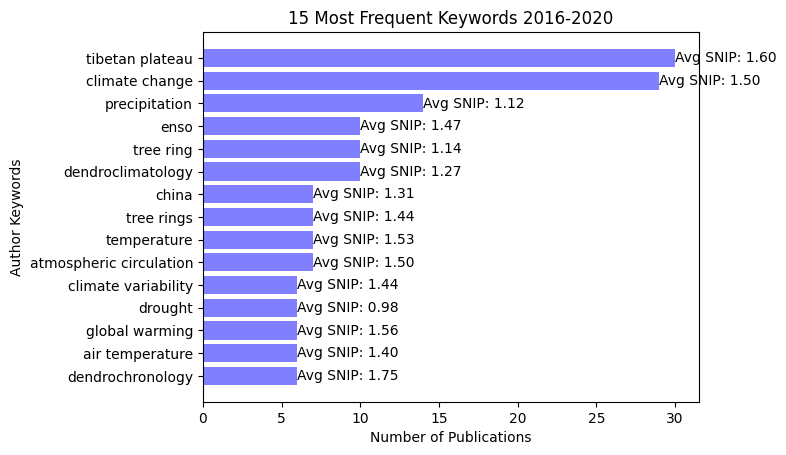

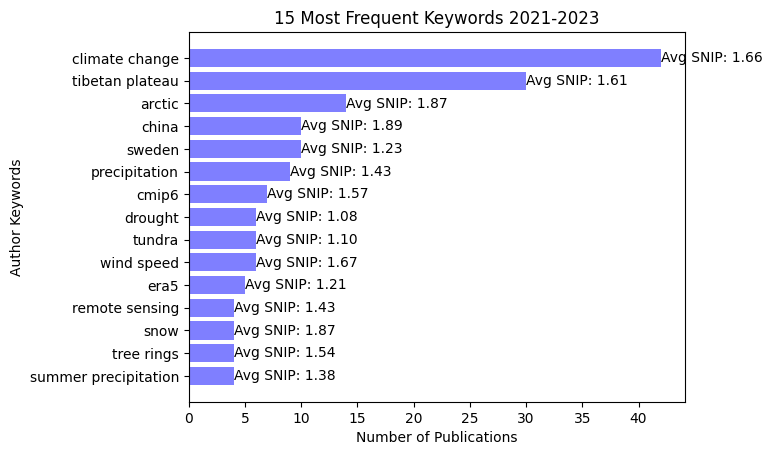

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_excel('keywords_split.xlsx')

# Function to create the chart
def create_chart(df, start_year, end_year, title):
    # Filter the data for the specified years
    df = df[df['Year'].between(start_year, end_year)]

    # Calculate the average SNIP and the count of ids per name
    snip_avg = df.groupby('Author Keywords')['snip'].mean()
    id_counts = df.groupby('Author Keywords')['id'].count()

    # Combine the two dataframes and sort by the number of ids
    combined = pd.concat([snip_avg, id_counts], axis=1, keys=['Average SNIP', 'Number of ids'])
    combined = combined.sort_values('Number of ids', ascending=True)

    # Take the top 15 keywords by the number of ids
    combined = combined.tail(15)

    # Create a new figure and a subplot
    fig, ax = plt.subplots()

    # Plot the number of ids per keyword
    bars = ax.barh(combined.index, combined['Number of ids'], color='b', alpha=0.5, label='Number of ids')
    ax.set_xlabel('Number of Publications')
    ax.set_ylabel('Author Keywords')

    # Write the average SNIP in the bars
    for bar, snip in zip(bars, combined['Average SNIP']):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'Avg SNIP: {snip:.2f}', va='center')

    # Set the title of the chart
    ax.set_title(title)

    # Show the plot
    plt.show()

    # Save the figure
    fig.savefig(f'keywords_{start_year}_{end_year}.png')

# Create the charts
create_chart(df, 2016, 2020, '15 Most Frequent Keywords 2016-2020')
create_chart(df, 2021, 2023, '15 Most Frequent Keywords 2021-2023')

In [7]:
# create a file with gup-scopus-snip

# Load the Excel files into pandas dataframes
df1 = pd.read_excel('geovet_publ_2016-2023.xlsx')
df2 = pd.read_excel('geovet_snip_individ.xlsx')

# Merge the dataframes on the specified columns
merged_df = pd.merge(df1, df2, left_on='DOI', right_on='doi')

# Display the merged dataframe
print(merged_df)

# Save the data to an xlsx file
merged_df.to_excel('geovet_gup_scopus_snip_2016-2023.xlsx', index=False)


                                                Authors  \
0     Minola L.; Zhang G.; Ou T.; Kukulies J.; Curio...   
1     Minola L.; Zhang G.; Ou T.; Kukulies J.; Curio...   
2     Minola L.; Zhang G.; Ou T.; Kukulies J.; Curio...   
3     Minola L.; Zhang G.; Ou T.; Kukulies J.; Curio...   
4     Minola L.; Zhang G.; Ou T.; Kukulies J.; Curio...   
...                                                 ...   
1378  Lockhart E.; Wild B.; Richter A.; Simonin K.; ...   
1379                                    Fan L.; Chen D.   
1380  Wei T.; Dong W.; Moore J.; Yan Q.; Song Y.; Ya...   
1381    Liu W.; Wang L.; Chen D.; Tu K.; Ruan C.; Hu Z.   
1382          Konrad-Schmolke M.; Halama R.; Manea V.C.   

                                      Author full names  \
0     Minola, Lorenzo (57191821634); Zhang, Gangfeng...   
1     Minola, Lorenzo (57191821634); Zhang, Gangfeng...   
2     Minola, Lorenzo (57191821634); Zhang, Gangfeng...   
3     Minola, Lorenzo (57191821634); Zhang, Gangfeng...